# HW3
Дане домашнє завдання буде повністю пов'язане з лінійною регресією та її реалізацією.

Отож розіб'ємо наше домашнє завдання на декілька частин:

* напишіть функцію гіпотези лінійної регресії у векторному вигляді;
* створіть функцію для обчислення функції втрат у векторному вигляді;
* реалізуйте один крок градієнтного спуску;
* знайдіть найкращі параметри `$\vec{w}$` для [датасету](https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view) прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
* знайдіть ці ж параметри за допомогою аналітичного рішення;
* порівняйте отримані результати.

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Data prepairing

In [3]:
URL = "https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view"
file_id=URL.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
base_df = pd.read_csv(dwn_url)
base_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Tasks

 ## Графіки

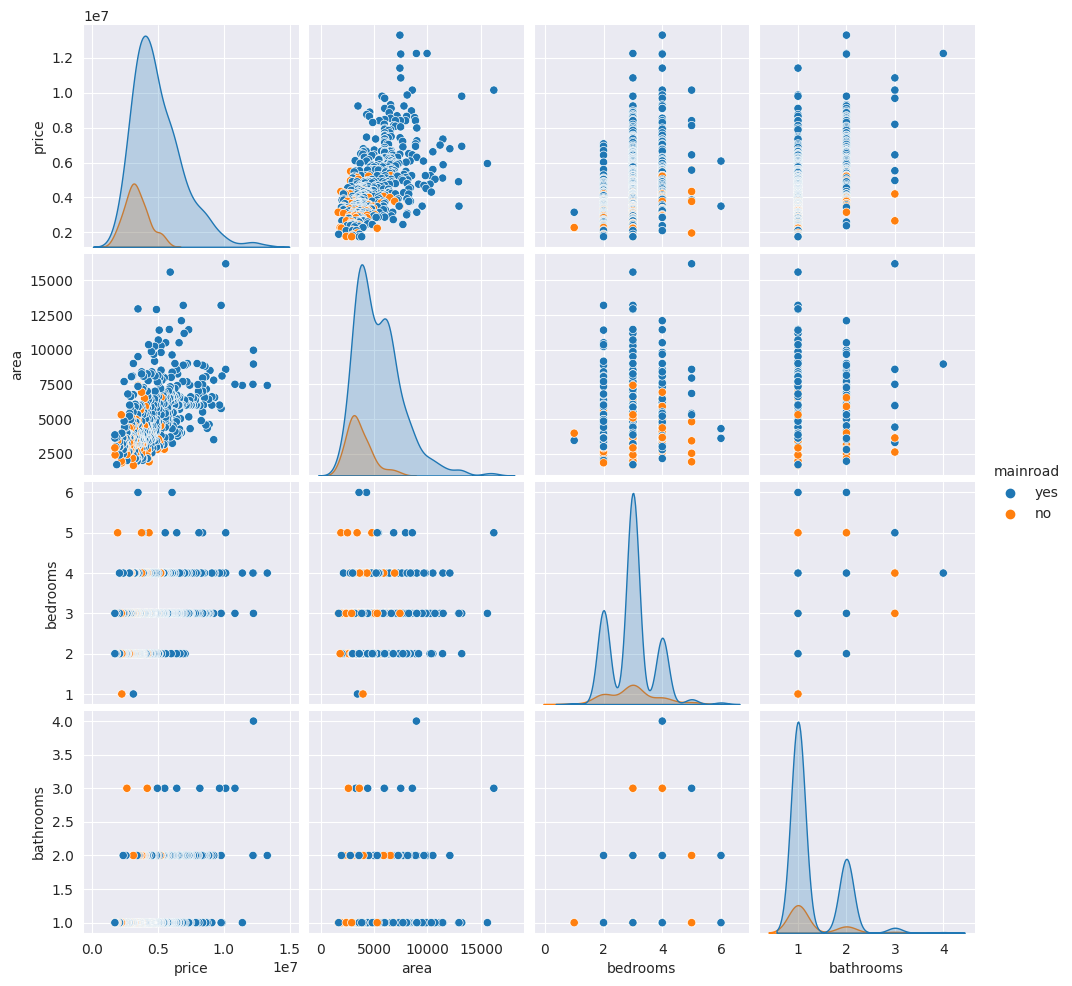

In [4]:
sns.set_style('darkgrid')

sns.pairplot(
  base_df,
  vars = ['price', 'area', 'bedrooms', 'bathrooms'],
  hue = 'mainroad'
)

## Функція гіпотези лінійної регресії у векторному вигляді
$$ h(x) = w_0 + w_1*x $$

In [12]:
def lr_hypothesis(w: np.ndarray, X :pd.DataFrame):

    # Додаємо стовпець з одиницями для зсуву (інтерсепта)
    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X.values])

    # Виконуємо матричне множення w і X
    predictions = np.dot(X_with_bias, w)

    return predictions

w = np.array([1, 2])

X = pd.DataFrame({
    'feature': [3, 5]
})

print("Result:", lr_hypothesis(w, X))

Result: [ 7. 11.]


   ## Обчислення функції втрат у векторному вигляді

In [6]:
def compute_cost(w: np.ndarray, X :pd.DataFrame, y: np.ndarray):

    m = len(y)  # Кількість прикладів у датасеті

    # Обчислення прогнозованих значень
    predictions = lr_hypothesis(w, X)

    # Обчислення середньоквадратичної помилки
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)

    return cost

## Реалізація одного кроку градієнтного спуску

In [14]:
def gradient_descent_step(w: np.ndarray, X :pd.DataFrame, y: np.ndarray, learning_rate: float):

  m = len(y)  # Кількість прикладів у датасеті

  # Обчислення прогнозованих значень
  predictions = lr_hypothesis(w, X)

  # Обчислення похідних функції втрат
  gradient_0 = (1/m) * np.sum(predictions - y)
  gradient_1 = (1/m) * np.dot((predictions - y), X)

  # Оновлення параметрів за допомогою градієнтного спуску
  w[0] = w[0] - learning_rate * gradient_0
  w[1] = w[1] - learning_rate * gradient_1

  return w

w = np.array([0.0, 0.0])
X = pd.DataFrame({
    'feature': [1, 2, 3, 4, 5]
})
y = np.array([6, 7, 8, 9, 10])
learning_rate = 0.01

print("Result:", gradient_descent_step(w, X, y, learning_rate))

Result: [0.08 0.26]


## Аналітичне рішення

In [10]:
def analytical_solution(X :pd.DataFrame, y: np.ndarray):
  # Додаємо стовпець з одиницями для зсуву (інтерсепта)
  X_bias = np.c_[np.ones((X.shape[0], 1)), X]

  result = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
  return result[1:]

## Результати

In [11]:
X = base_df[['area', 'bathrooms', 'bedrooms']]
y = base_df['price']
lr = LinearRegression()

optimized_w = lr.fit(X, y).coef_
analytical_w = analytical_solution(X, y)

print("Parameters from Gradient Descent:", optimized_w)
print("Parameters from Analytical Solution:", analytical_w)
print("Comparison:")
print(optimized_w[0], analytical_w[0], optimized_w[0] == analytical_w[0])
print(optimized_w[1], analytical_w[1], optimized_w[1] == analytical_w[1])
print(optimized_w[2], analytical_w[2], optimized_w[2] == analytical_w[2])

Parameters from Gradient Descent: [3.78762754e+02 1.38604950e+06 4.06820034e+05]
Parameters from Analytical Solution: [3.78762754e+02 1.38604950e+06 4.06820034e+05]
Comparison:
378.7627535851046 378.7627535851048 False
1386049.4977909971 1386049.497790995 False
406820.03376918205 406820.0337691842 False
